In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib as mlp
label_size=14
mlp.rcParams['xtick.labelsize']=label_size
mlp.rcParams['ytick.labelsize']=label_size

In [78]:
k = 5 # Constante del muelle
m = 1.0   # Masa
B = .5# Constante de amortiguación

def armonico(variables, t):
    x, y = variables
    return [y, -k * x / m - B / m * y]

inicial = [0.6, 0.4] # Vector de posición inicial y velocidad inicial
# condiciones iniciales x(t=0)=0.6 [m] y(t=0)=0.4 [m/s]

#tiempo = np.linspace(0, 15)  # Dominio temporal de 0 a 15 
tiempo = np.arange(0, 20, .01)

resultado = odeint(armonico, inicial, tiempo) 
#El sistema se resuelve  con 
#odeint(sistema, condiciones iniciales, rango donde graficaremos)

In [79]:
xx, yy=resultado.T #extraer posición y velocidad.omega0 = k/m

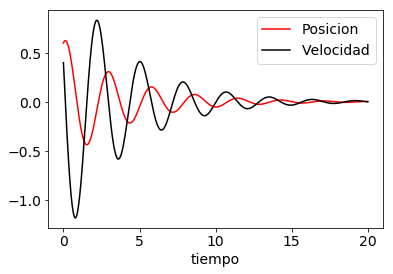

In [80]:
plt.plot(tiempo, xx, c = 'r', label="Posicion") 
plt.plot(tiempo, yy, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

In [81]:
omega0 = k/m

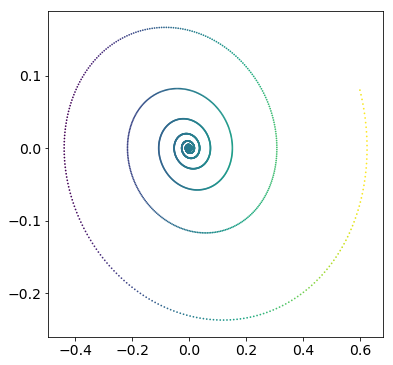

In [82]:
plt.figure(figsize = (6,6))
plt.scatter(xx, yy/omega0, lw = 0, s = 3, cmap = 'viridis', c = xx)
plt.show()

In [83]:
from ipywidgets import *

In [84]:
def amortiguado(t = 0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(tiempo, xx,  'k-')
    ax.plot(tiempo[t], xx[t],  'ro')
    ax.text(4, .6, 'tiempo =    %s'%tiempo[t])
    ax.text(4, .5, 'posición =  %s'%xx[t])
    fig.canvas.draw()
t_f = len(tiempo) 
interact_manual(amortiguado, t = (0, t_f, 1));